# How well do jobs pay for Data Roles?

In [1]:
#install and import libraries

import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#load dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) 
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_us = df[(df['job_country'] == 'United States')].dropna(subset='salary_year_avg').copy()
job_titles = df_us['job_title_short'].value_counts().index[:6].tolist()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [18]:
df_us_top6 = df_us[df_us['job_title_short'].isin(job_titles)]

In [21]:
job_order = df_us_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

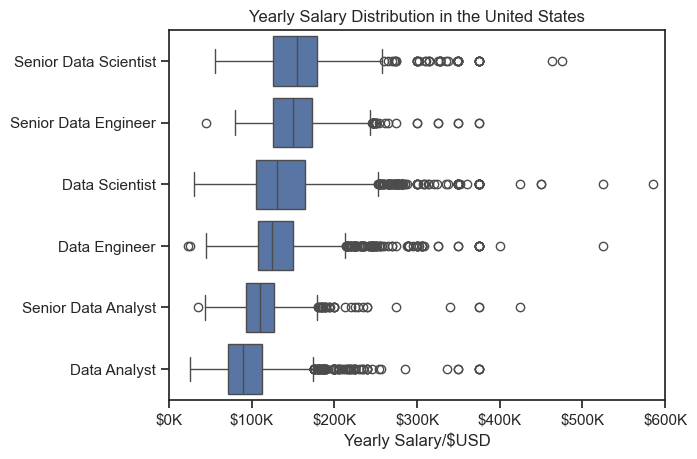

In [22]:

sns.boxplot(data=df_us_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
plt.xlabel('Yearly Salary/$USD')
plt.title('Yearly Salary Distribution in the United States')
ax = plt.gca()
plt.ylabel('')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()

# Median Salary Vs Skills for Data Analysts 

In [34]:
df_da_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_da_us = df_da_us.dropna(subset=['salary_year_avg'])
df_da_us = df_da_us.explode('job_skills')

In [35]:
df_da_top_pay = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)
df_da_top_pay = df_da_top_pay.head(10)
df_da_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [46]:
df_da_skills = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_da_skills = df_da_skills.head(10).sort_values(by='median', ascending=False)
df_da_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


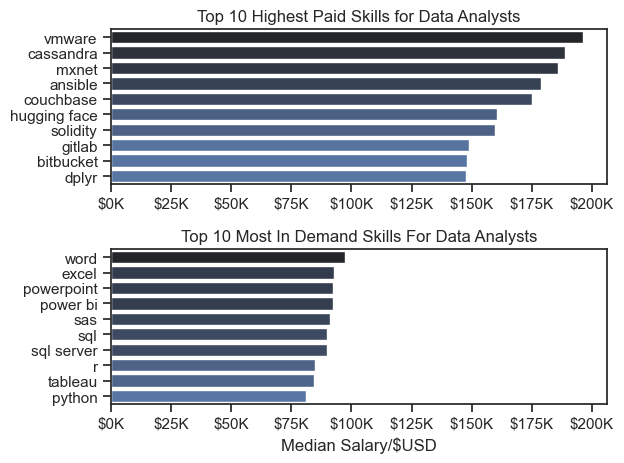

In [45]:
fig, ax = plt.subplots(2,1)
sns.set_theme(style='ticks')

#df_da_us_top_pay.plot(kind='barh', y ='median', ax=ax[0], legend=False)
sns.barplot(data=df_da_top_pay[::-1], x='median', y=df_da_top_pay.index, ax=ax[0], hue='median', palette= 'dark:b_r')
ax[0].invert_yaxis()
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_xlabel("")
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[0].legend().remove()


#df_da_us_skills[::-1].plot(kind='barh', y ='median', ax=ax[1], legend=False)
sns.barplot(data=df_da_skills[::-1], x='median', y=df_da_skills.index, ax=ax[1], hue='median', palette='dark:b_r')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].invert_yaxis()
ax[1].set_title('Top 10 Most In Demand Skills For Data Analysts')
ax[1].set_xlabel('Median Salary/$USD')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].legend().remove()

fig.tight_layout()